<a href="https://colab.research.google.com/github/sinara08/deep-learning/blob/main/FSDS_DL_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.read_csv('/content/aps_data.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,neg,31394,na,0,na,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,neg,1598,na,0,na,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,neg,42,2,2130706454,56,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,neg,32752,na,0,na,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [3]:
aps=pd.read_csv('/content/aps_data.csv')
aps.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [4]:
aps.shape

(5000, 171)

In [5]:
aps.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [6]:
aps.replace("na",np.nan, inplace=True)

In [7]:
pd.options.display.max_rows = 1000
aps.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [8]:
aps.isnull().sum().sum()


71649

In [9]:
aps.isnull().sum().sort_values(ascending=False).reset_index().rename(columns={0:"Null_Value_Cnt"})

,index,Null_Value_Cnt
0,br_000,4105
1,bq_000,4043
2,bp_000,3960
3,ab_000,3849
4,cr_000,3849
5,bo_000,3832
6,bn_000,3631
7,bm_000,3273
8,bl_000,2234
9,bk_000,1880


In [10]:
aps.fillna(aps.median(), inplace=True)

<ipython-input-10-0466eda3579d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aps.fillna(aps.median(), inplace=True)


In [11]:
aps.shape

(5000, 171)

In [12]:
aps.isnull().sum().sum()

0

In [13]:
aps.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [14]:
x=aps.drop('class', axis=1)
y = aps['class']

In [15]:
x.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [16]:
y = pd.get_dummies(y, drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170)
(1000, 170)
(4000, 1)
(1000, 1)


In [19]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [21]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer = 'he_uniform', activation='relu', input_dim = 170))
classifier.add(Dense(units=10, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [22]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 3s 3ms/step - loss: 0.3950 - accuracy: 0.8813 - val_loss: 0.1644 - val_accuracy: 0.9780
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.1201 - accuracy: 0.9800 - val_loss: 0.0732 - val_accuracy: 0.9900
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9920
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9903 - val_loss: 0.0419 - val_accuracy: 0.9910
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0396 - val_accuracy: 0.9890
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0414 - val_accuracy: 0.9900
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0428 - val_accuracy: 0.9900
Epoch 

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
model_history.history['loss']

[0.3949539363384247,
 0.12012019753456116,
 0.05229071155190468,
 0.03369650989770889,
 0.02398817427456379,
 0.01974564418196678,
 0.01749577559530735,
 0.013342763297259808,
 0.012886046431958675,
 0.011849040165543556,
 0.011139949783682823,
 0.009786909446120262,
 0.0089032594114542,
 0.012502385303378105,
 0.008712747134268284,
 0.008037795312702656,
 0.00746777281165123,
 0.00881708413362503,
 0.008140100166201591,
 0.00646524503827095,
 0.005225670989602804,
 0.004592495504766703,
 0.01025478821247816,
 0.0044944994151592255,
 0.00416899798437953,
 0.0037840616423636675,
 0.004193403758108616,
 0.004836419131606817,
 0.007921532727777958,
 0.003831924870610237]

In [27]:
model_history.history['accuracy']

[0.8813333511352539,
 0.9800000190734863,
 0.9856666922569275,
 0.9903333187103271,
 0.9919999837875366,
 0.9940000176429749,
 0.9943333268165588,
 0.9956666827201843,
 0.9953333139419556,
 0.9963333606719971,
 0.9959999918937683,
 0.9956666827201843,
 0.9956666827201843,
 0.9946666955947876,
 0.9963333606719971,
 0.9973333477973938,
 0.996999979019165,
 0.9959999918937683,
 0.996999979019165,
 0.996999979019165,
 0.9980000257492065,
 0.9983333349227905,
 0.996666669845581,
 0.9986666440963745,
 0.9983333349227905,
 0.9983333349227905,
 0.9980000257492065,
 0.9986666440963745,
 0.996999979019165,
 0.9980000257492065]

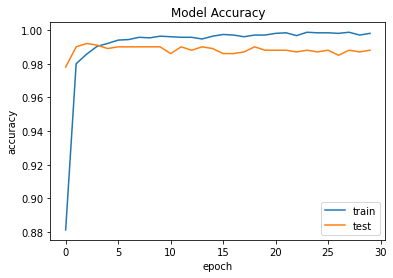

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

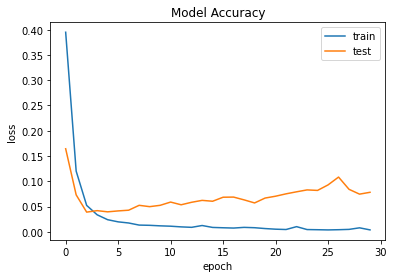

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [30]:
y_pred = classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [31]:
y_pred = y_pred>0.5 #sigmoid threshold is 0.5

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test, y_pred)

array([[981,   5],
       [  4,  10]])

In [34]:
#hyperparameter tuning using keras tuner
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.4 MB/s eta 0:00:00


In [35]:
from kerastuner.tuners import RandomSearch

<ipython-input-35-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [36]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=32, kernel_initializer = 'he_uniform', activation='relu', input_dim = 170))
  model.add(Dense(units=10, kernel_initializer = 'he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [37]:
tuner_1 = RandomSearch(build_model, objective='val_accuracy',max_trials = 5, directory = 'project__12', project_name='aps-fault')

In [38]:
tuner_1.search(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.9860000014305115

Best val_accuracy So Far: 0.9929999709129333
Total elapsed time: 00h 00m 14s


In [39]:
tuner_1.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [40]:
mymodel = tuner_1.get_best_models(num_models=1)[0]

In [41]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,813
Trainable params: 5,813
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow import keras
from keras import optimizers
def build_model(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers', 2, 20)):
    model.add(Dense(units=hp.Int('unit_'+str(i),min_value=32, max_value = 512, step=32), kernel_initializer = 'he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizers.RMSprop(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [43]:
tuner_3=RandomSearch(build_model, objective = 'val_accuracy', max_trials=5, directory='project__14', project_name='aps-fault')

In [44]:
tuner_3.search(X_train, y_train, epochs=5, validation_data = (X_test, y_test))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.9860000014305115

Best val_accuracy So Far: 0.9959999918937683
Total elapsed time: 00h 00m 29s


In [45]:
tuner_3.get_best_hyperparameters()[0].values

{'num_layers': 14,
 'unit_0': 64,
 'unit_1': 256,
 'learning_rate': 0.001,
 'unit_2': 32,
 'unit_3': 32,
 'unit_4': 32,
 'unit_5': 32,
 'unit_6': 32,
 'unit_7': 32,
 'unit_8': 32,
 'unit_9': 32,
 'unit_10': 32,
 'unit_11': 32,
 'unit_12': 32,
 'unit_13': 32}

In [ ]:
mymodel5 = tuner_3.get_best_models(num_models=1)[0]

In [ ]:
h_model = tuner_3.hypermodel.build(mymodel5)

AttributeError: ignored

In [ ]:
mymodel3.summary()

ValueError: ignored